<a href="https://colab.research.google.com/github/9922829133/Classification-Project/blob/main/Final_Airline_Passenger_referral_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Airline Passenger Referral Prediction**
##### **Project Type**    - Classification
##### **Contribution**    - Individual



# **Project Summary -**

The Airline Passenger Referral Prediction project aims to develop a machine learning model that accurately identifies passengers likely to refer the airline to others. By analyzing passenger data and behaviors, the goal is to enhance marketing strategies, boost customer satisfaction, and cultivate a more loyal customer base.







# **GitHub Link -**

# **Problem Statement**
**Business Context**

Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019. The main objective is to predict whether passengers will refer the airline to their friends.

# **General Guidelines** : -  
**Project Evaluation Criteria**

Efficient EDA

Understanding of how to prep the data and make it ready for training.

Understanding the target feature and its distribution

Assessing target features for class imbalance.

Modeling - which algorithm to use?

Evaluation while keeping class imbalance in mind.

Feature Importance and Conclusion

Understanding how your project is useful to stakeholders

# ***Let's Begin !***

#**Import Libraries**

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

#**Dataset Loading**

In [202]:
#loading data
df = pd.read_excel('/content/data_airline_reviews.xlsx')

#**Dataset First View**

In [203]:
# Explore the data
df.head()


,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#**Dataset Information**

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#**Dataset Describe**

In [205]:
# Dataset Describe
df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#**Checking and removing duplicate values**

In [206]:
df.duplicated().sum()


70711

In [207]:
df = df.drop_duplicates()

In [208]:
df.duplicated().sum()

0

#**Dataset Information**

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61184 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          61183 non-null  object 
 1   overall          59401 non-null  float64
 2   author           61183 non-null  object 
 3   review_date      61183 non-null  object 
 4   customer_review  61183 non-null  object 
 5   aircraft         18488 non-null  object 
 6   traveller_type   37540 non-null  object 
 7   cabin            58705 non-null  object 
 8   route            37513 non-null  object 
 9   date_flown       37434 non-null  object 
 10  seat_comfort     56211 non-null  float64
 11  cabin_service    56240 non-null  float64
 12  food_bev         48341 non-null  float64
 13  entertainment    40230 non-null  float64
 14  ground_service   37169 non-null  float64
 15  value_for_money  59327 non-null  float64
 16  recommended      59761 non-null  object 
dtypes: float64(

#**Reduced the file size**

In [212]:
df = df[:len(df)//3]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4396 entries, 7 to 35113
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          4396 non-null   object 
 1   overall          4396 non-null   float64
 2   author           4396 non-null   object 
 3   review_date      4396 non-null   object 
 4   customer_review  4396 non-null   object 
 5   aircraft         4396 non-null   object 
 6   traveller_type   4396 non-null   object 
 7   cabin            4396 non-null   object 
 8   route            4396 non-null   object 
 9   date_flown       4396 non-null   object 
 10  seat_comfort     4396 non-null   float64
 11  cabin_service    4396 non-null   float64
 12  food_bev         4396 non-null   float64
 13  entertainment    4396 non-null   float64
 14  ground_service   4396 non-null   float64
 15  value_for_money  4396 non-null   float64
 16  recommended      4396 non-null   object 
dtypes: float64(7)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4396 entries, 7 to 35113
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          4396 non-null   object 
 1   overall          4396 non-null   float64
 2   author           4396 non-null   object 
 3   review_date      4396 non-null   object 
 4   customer_review  4396 non-null   object 
 5   aircraft         4396 non-null   object 
 6   traveller_type   4396 non-null   object 
 7   cabin            4396 non-null   object 
 8   route            4396 non-null   object 
 9   date_flown       4396 non-null   object 
 10  seat_comfort     4396 non-null   float64
 11  cabin_service    4396 non-null   float64
 12  food_bev         4396 non-null   float64
 13  entertainment    4396 non-null   float64
 14  ground_service   4396 non-null   float64
 15  value_for_money  4396 non-null   float64
 16  recommended      4396 non-null   object 
dtypes: float64(7)

In [214]:
df.sample(3)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
7551,Emirates,10.0,R Canty,28th March 2016,"Kuala Lumpur to Melbourne with Emirates, and t...",Boeing 777-300,Couple Leisure,Business Class,KUL to MEL,March 2016,5.0,5.0,5.0,4.0,5.0,4.0,yes
3673,Qatar Airways,7.0,A Dastarzi,31st October 2017,âœ… Verified Review | Tehran to Perth via Doha...,Boeing 777-330er / A380-800,Business,Economy Class,Tehran to Perth via Doha,October 2017,4.0,4.0,3.0,4.0,4.0,4.0,yes
87,Turkish Airlines,6.0,S Railey,13th March 2019,âœ… Trip Verified | Manila to Istanbul. If you...,Boeing 777-300ER,Family Leisure,Economy Class,Manila to Istanbul,January 2019,4.0,3.0,3.0,5.0,3.0,4.0,no


In [215]:
# Remove the specified columns
data_columns = ['review_date', 'customer_review', 'date_flown', 'route']

df = df.drop(columns=data_columns, axis=1)


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4396 entries, 7 to 35113
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          4396 non-null   object 
 1   overall          4396 non-null   float64
 2   author           4396 non-null   object 
 3   aircraft         4396 non-null   object 
 4   traveller_type   4396 non-null   object 
 5   cabin            4396 non-null   object 
 6   seat_comfort     4396 non-null   float64
 7   cabin_service    4396 non-null   float64
 8   food_bev         4396 non-null   float64
 9   entertainment    4396 non-null   float64
 10  ground_service   4396 non-null   float64
 11  value_for_money  4396 non-null   float64
 12  recommended      4396 non-null   object 
dtypes: float64(7), object(6)
memory usage: 480.8+ KB


In [217]:
df.head()

,airline,overall,author,aircraft,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
7,Turkish Airlines,10.0,Zeshan Shah,A330,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
15,Turkish Airlines,2.0,S Gonser,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,3.0,3.0,2.0,3.0,1.0,2.0,no
17,Turkish Airlines,6.0,Sami Osman,A320 / Boeing 737,Solo Leisure,Economy Class,2.0,3.0,3.0,3.0,3.0,3.0,yes
19,Turkish Airlines,1.0,Norka Idalia Orlando,A320 / A330,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no
29,Turkish Airlines,2.0,Trevor Khurana,Boeing 777-300,Solo Leisure,Economy Class,1.0,3.0,2.0,2.0,1.0,1.0,no


In [218]:
df['traveller_type'].unique()

array(['Solo Leisure', 'Couple Leisure', 'Business', 'Family Leisure'],
      dtype=object)

In [219]:
len(df['author'].unique())

3460

#**Encode categorical variables**

In [220]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Referral' is the target variable and other columns are features
X = df.drop('recommended', axis=1)
y = df['recommended']

# Encode categorical variables
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype(str)  # Ensure all data in the column is treated as strings
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [221]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [222]:
X.head()

,airline,overall,author,aircraft,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
7,11,10.0,3453,152,3,1,4.0,5.0,5.0,5.0,5.0,5.0
15,11,2.0,2864,448,3,1,3.0,3.0,2.0,3.0,1.0,2.0
17,11,6.0,2999,54,3,1,2.0,3.0,3.0,3.0,3.0,3.0
19,11,1.0,2364,44,3,1,1.0,1.0,1.0,1.0,1.0,1.0
29,11,2.0,3264,634,3,1,1.0,3.0,2.0,2.0,1.0,1.0


In [223]:
y.head()

7     yes
15     no
17    yes
19     no
29     no
Name: recommended, dtype: object

#**Handle missing values**

In [165]:
# Fill NaN values in numerical columns with mean
X = X.fillna(X.mean())

# Fill NaN values in categorical columns with most frequent value
X = X.fillna(X.mode().iloc[0])

In [224]:
X.head()

,airline,overall,author,aircraft,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
7,11,10.0,3453,152,3,1,4.0,5.0,5.0,5.0,5.0,5.0
15,11,2.0,2864,448,3,1,3.0,3.0,2.0,3.0,1.0,2.0
17,11,6.0,2999,54,3,1,2.0,3.0,3.0,3.0,3.0,3.0
19,11,1.0,2364,44,3,1,1.0,1.0,1.0,1.0,1.0,1.0
29,11,2.0,3264,634,3,1,1.0,3.0,2.0,2.0,1.0,1.0


In [225]:
# Fill NaN values in target (y)
y = y.fillna(y.mode().iloc[0])  # Assuming the target is categorical

In [226]:
y.head()

7     yes
15     no
17    yes
19     no
29     no
Name: recommended, dtype: object

#**Using Random Forest Classifier algorithem**

In [227]:
# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [228]:
# Predict on the test set
y_pred = rf_clf.predict(X_test)

In [230]:
# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.9352272727272727
Classification Report:
              precision    recall  f1-score   support

          no       0.89      0.91      0.90       283
         yes       0.96      0.95      0.95       597

    accuracy                           0.94       880
   macro avg       0.92      0.93      0.93       880
weighted avg       0.94      0.94      0.94       880



**Visulization**

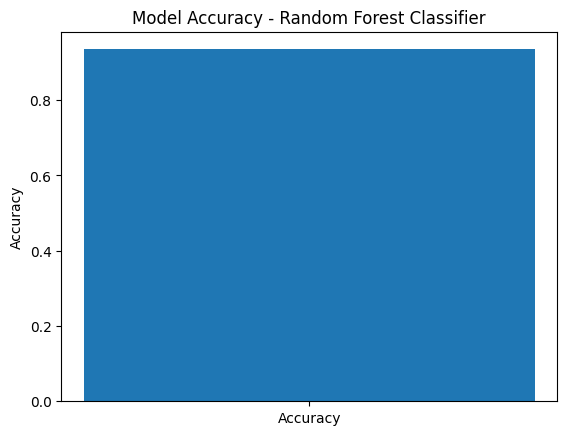

In [231]:
# Plotting accuracy
plt.bar(["Accuracy"], [accuracy])
plt.title('Model Accuracy - Random Forest Classifier')
plt.ylabel('Accuracy')
plt.show()

#**Using Logistic Regression Classifier algorithem**

In [232]:
#Train a Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

# Initialize and train a Logistic Regression Classifier
log_reg = LogisticRegression(random_state=42, max_iter=1000)  # Increase max_iter if necessary
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [233]:
# Predict on the test set
y_pred = log_reg.predict(X_test)


In [234]:
# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Accuracy: 0.9420454545454545
Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.91      0.91       283
         yes       0.96      0.96      0.96       597

    accuracy                           0.94       880
   macro avg       0.93      0.93      0.93       880
weighted avg       0.94      0.94      0.94       880



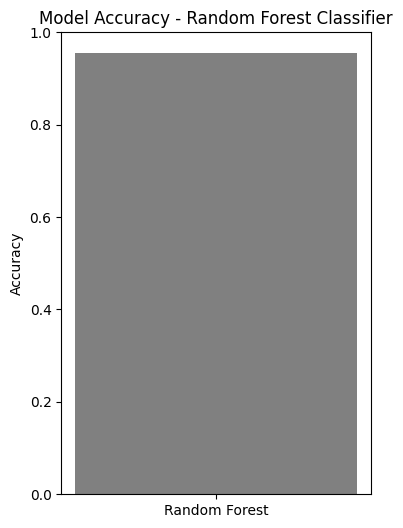

In [200]:
# Plotting accuracy for RandomForestClassifier
plt.figure(figsize=(4, 6))
plt.bar(["Random Forest"], [accuracy], color='gray')
plt.title('Model Accuracy - Random Forest Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

#**Understanding how your project is useful to stakeholders**

**Project's Value to Stakeholders**

**Airlines:** Improves services based on passenger feedback, enhancing satisfaction and loyalty.

**Travel Agencies:** Enhances recommendations for travelers, improving user experiences.

**Passengers:** Enjoy better travel experiences due to improved airline services.

**Industry Analysts:** Provides insights for evaluating airline performance and industry standards.

The model drives improvements, benefiting both service providers and travelers alike.

